In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"   

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from tensorflow.keras import backend
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling3D
from keras.layers import Convolution2D, ConvLSTM2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import load_model

Using TensorFlow backend.


In [3]:
trainX = np.load('H:/LI project/3d sk detect/UTD-MHAD/sk_UTD1234_trainx.npy')
trainX = trainX.reshape(-1,3,20,3,1)
print(np.shape(trainX))

(9073, 3, 20, 3, 1)


In [4]:
testX = np.load('H:/LI project/3d sk detect/UTD-MHAD/sk_UTD1234_testx.npy')
testX = testX.reshape(-1,3,20,3,1)
print(np.shape(testX))

(10073, 3, 20, 3, 1)


In [5]:
trainY=np.load('H:/LI project/3d sk detect/UTD-MHAD/sk_UTD1234_trainy.npy')
print(trainY[0:5])
print(np.shape(trainY))

['a10' 'a10' 'a10' 'a10' 'a10']
(9073,)


In [6]:
testY=np.load('H:/LI project/3d sk detect/UTD-MHAD/sk_UTD1234_testy.npy')
print(testY[0:5])
print(np.shape(testY))

['a10' 'a10' 'a10' 'a10' 'a10']
(10073,)


In [7]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

In [8]:
index = [i for i in range(len(trainX))]  
np.random.seed(42)
np.random.shuffle(index) 
trainX = trainX[index]
trainY = trainY[index]

In [9]:
index2 = [i for i in range(len(testX))] 
np.random.seed(42)
np.random.shuffle(index2) 
testX = testX[index2]
testY = testY[index2]

In [10]:
le = LabelEncoder().fit(trainY)   # LabelEncoder可以将标签分配一个0—n_classes-1之间的编码 
print(list(le.classes_))
print(trainY[0:5])
trainY = np_utils.to_categorical(le.transform(trainY), 27)  # 2是num_class表示输出的是2列数据的意思
print(trainY[0:5])

['a1', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a2', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
['a11' 'a18' 'a23' 'a25' 'a24']
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [11]:
# le2 = LabelEncoder().fit(testY)   # LabelEncoder可以将标签分配一个0—n_classes-1之间的编码 
# print(testY)
print(list(le.classes_))
print(testY[0:5])
testY = np_utils.to_categorical(le.transform(testY), 27)  # 2是num_class表示输出的是2列数据的意思
print(testY[0:5])

['a1', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a2', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
['a6' 'a10' 'a9' 'a12' 'a10']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [12]:

print(trainX[0,:])
print(np.shape(trainY))
print(trainY)
print(np.shape(testX))
print(testY)

[[[[-1.28283188e-01]
   [ 4.99460369e-01]
   [ 2.91973400e+00]]

  [[-1.23494588e-01]
   [ 3.15305948e-01]
   [ 2.95397687e+00]]

  [[-1.06745847e-01]
   [-3.48100103e-02]
   [ 2.95866585e+00]]

  [[-9.68707725e-02]
   [-9.61137712e-02]
   [ 2.90571880e+00]]

  [[-2.79249340e-01]
   [ 1.94479212e-01]
   [ 2.92104793e+00]]

  [[-3.10397536e-01]
   [-7.59423897e-02]
   [ 2.87075448e+00]]

  [[-2.96790272e-01]
   [-2.97903270e-01]
   [ 2.83054590e+00]]

  [[-2.77715772e-01]
   [-3.62904131e-01]
   [ 2.82444715e+00]]

  [[ 5.20218872e-02]
   [ 2.05420479e-01]
   [ 2.96250033e+00]]

  [[ 1.61389515e-01]
   [ 3.88560034e-02]
   [ 2.88181734e+00]]

  [[ 2.41897255e-01]
   [ 1.30606815e-01]
   [ 2.63154864e+00]]

  [[ 2.33825266e-01]
   [ 1.44887835e-01]
   [ 2.59717035e+00]]

  [[-1.66659564e-01]
   [-1.74090251e-01]
   [ 2.87918830e+00]]

  [[-1.73245728e-01]
   [-6.31246626e-01]
   [ 2.97683001e+00]]

  [[-1.41321436e-01]
   [-9.96384263e-01]
   [ 3.01955414e+00]]

  [[-1.74550697e-01]
   [

In [13]:
model = tf.keras.Sequential()
input_shape = (trainX.shape[1],trainX.shape[2],trainX.shape[3],trainX.shape[4])
model.add(layers.ConvLSTM2D(kernel_size=(3,3), 
                            activation='relu', 
                            filters=60,
                            padding='same',
                            input_shape=input_shape,
                            data_format = 'channels_last',
                            return_sequences=True))
#model.add(MaxPooling3D(pool_size = (3,50,3),strides = None,padding='same'))
#model.add(ConvLSTM2D(50, kernel_size=(3, 3), activation='relu', padding='same',return_sequences=True))
model.add(layers.Flatten())
#model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1024))
#model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(512))
#model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(rate=0.5))
# model.add(layers.Dense(128))
# #model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
model.add(layers.Dense(27, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 3, 20, 3, 60)      132000    
_________________________________________________________________
flatten (Flatten)            (None, 10800)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              11060224  
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________

In [14]:
ade = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
nadam=tf.keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [17]:
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ["accuracy"])

H = model.fit(trainX, trainY, 
              batch_size = 64, epochs = 100, verbose = 1,validation_data=(testX, testY))  #verbose = 1显示进度条

Train on 9073 samples, validate on 10073 samples
Epoch 1/100
9073/9073 [==============================] - 3s 292us/sample - loss: 0.0655 - acc: 0.9759 - val_loss: 0.2666 - val_acc: 0.9513
Epoch 2/100
9073/9073 [==============================] - 2s 248us/sample - loss: 0.0624 - acc: 0.9769 - val_loss: 0.2601 - val_acc: 0.9518
Epoch 3/100
9073/9073 [==============================] - 2s 248us/sample - loss: 0.0606 - acc: 0.9774 - val_loss: 0.2929 - val_acc: 0.9504
Epoch 4/100
9073/9073 [==============================] - 2s 248us/sample - loss: 0.0586 - acc: 0.9778 - val_loss: 0.2763 - val_acc: 0.9510
Epoch 5/100
9073/9073 [==============================] - 2s 246us/sample - loss: 0.0559 - acc: 0.9786 - val_loss: 0.3012 - val_acc: 0.9496
Epoch 6/100
9073/9073 [==============================] - 2s 246us/sample - loss: 0.0536 - acc: 0.9790 - val_loss: 0.3195 - val_acc: 0.9488
Epoch 7/100
9073/9073 [==============================] - 2s 248us/sample - loss: 0.0517 - acc: 0.9800 - val_loss: 0.3

KeyboardInterrupt: 

In [25]:
model = tf.keras.models.load_model("H:/LI project/3d sk detect/UTD-MHAD/convlstm_UTD2dr0.5_976.hdf5")

In [18]:
predictions = model.predict(testX, batch_size = 64)
print(np.shape(predictions))
print(predictions.argmax(axis =1))
print(testY.argmax(axis = 1).shape)
leclass = [str(i) for i in le.classes_]
print(leclass)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1),
                           target_names = leclass,digits=3))

(10073, 27)
[23  1  8 ... 20 18 19]
(10073,)
['a1', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a2', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
              precision    recall  f1-score   support

          a1      0.216     0.046     0.076       349
         a10      0.351     0.215     0.267       404
         a11      0.113     0.016     0.028       438
         a12      0.374     0.526     0.437       397
         a13      0.375     0.150     0.214       361
         a14      0.308     0.444     0.363       394
         a15      0.158     0.107     0.128       354
         a16      0.108     0.032     0.050       341
         a17      0.109     0.308     0.161       386
         a18      0.168     0.151     0.159       358
         a19      0.276     0.125     0.172       385
          a2      0.012     0.021     0.015       326
         a20      0.008     0.006     0.007       338
         a21     

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


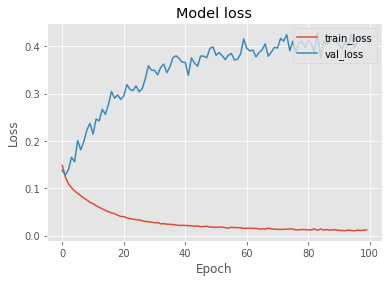

In [17]:
print(H.history.keys())
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, 200), H.history["loss"], label = "train_loss")
# plt.plot(np.arange(0, 200), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, 100), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label = "val_loss")
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train_loss','val_loss'],loc='upper right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


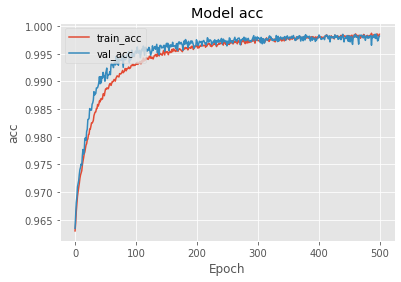

In [15]:
print(H.history.keys())
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 500), H.history["accuracy"], label = "acc")
plt.plot(np.arange(0, 500), H.history["val_accuracy"], label = "val_acc")
plt.title("Model acc")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.legend(['train_acc','val_acc'],loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


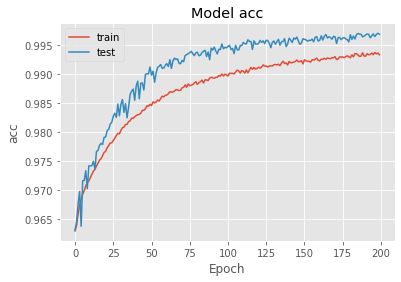

In [17]:
print(H.history.keys())
plt.figure()
plt.plot(H.history["accuracy"], label = "acc")
plt.plot(H.history["val_accuracy"], label = "val_acc")
plt.title("Model acc")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [16]:
model.save("H:/LI project/3d sk detect/UTD-MHAD/convlstm_UTD2dr0.5_976.hdf5")